In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix


,Time,Extension,Load,Tensile strain,Tensile stress
0,50.93800,2.12342,7.47733,8.49369,0.15291
1,47.82000,1.59411,0.51879,6.37643,0.01253
2,35.66400,1.48690,-26.16604,5.31037,-0.50887
3,89.11601,2.97094,1.81407,11.88376,0.04285
4,30.47200,1.27035,4.39340,5.08139,0.06824
5,59.64800,2.48658,-55.38951,9.94634,-0.91583
6,29.76000,1.24045,5.95648,4.96181,0.09392
7,67.15601,2.79982,0.25097,11.19929,0.00395
8,51.07600,2.12946,-26.62203,8.51785,-0.35075


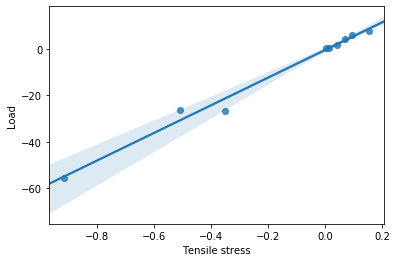

In [68]:

lista_arq = os.listdir('Dados/')
cols = ['Time','Extension','Load','Tensile strain','Tensile stress']
dados = []
for arq in lista_arq:
    if arq.split('.')[-1] == 'csv':
        dados.append(dict(list(zip(cols,pd.read_csv('Dados/'+arq).drop(['Strain 1'],axis=1).iloc[-1,:].values.tolist()))))

data = pd.DataFrame(columns=cols)
i = 0
for dado in dados:
    df = pd.DataFrame(dado,index=[i])
    data = pd.concat([data,df])
    i+= 1
data['Time'] = data['Time'].apply(lambda x: float(x))
data['Load'] = data['Load'].apply(lambda x: float(x))
data['Extension'] = data['Extension'].apply(lambda x: float(x))
data['Tensile strain'] = data['Tensile strain'].apply(lambda x: float(x))
data['Tensile stress'] = data['Tensile stress'].apply(lambda x: float(x))

sns.regplot(x='Tensile stress',y='Load',data=data)
data

In [55]:
a = np.array([1,2,3])
b = np.array([])
for i in a:
    b = np.append([b],[[i,0]])
b.reshape(-1,2)

array([[1., 0.],
       [2., 0.],
       [3., 0.]])

In [69]:
arr = np.array(data['Tensile stress'])
x = np.array([])
for i in arr:
    x = np.append([x],[[i,0]])
x = x.reshape(-1,2)
y = np.array(data['Load'])
reg = LinearRegression()
reg.fit(x,y)
a,b = reg.coef_
a,b

(59.34348049862631, 0.0)